# CBE 162 Fall 2024 Lab 5 Sympy Library

**Note:** Lab 4 did not have any Jupyter/Colab notebook associated with it.

This tutorial is taken from the SymPy [documentation](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)

Outline:
* Laplace Transforms using SymPy
* Inverse Laplace transforms using SymPy
* Reproducing the standard Laplace Transform table
* Partial fraction expansion

## Imports

In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, signal
import sympy

## Define variables and constants in SymPy

Define the variables and constants needed for $$f(t) = \exp (-at)$$ as ``sympy.symbols``


In [4]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

f = sympy.exp(-a*t)
print(f)

exp(-a*t)


Sympy provides a function called ``laplace_transform``. By default it will return conditions of convergence as well. Use this function to evaluate the laplace transform of $f(t)$

In [5]:
F = sympy.laplace_transform(f, t, s)
print(F)

(1/(a + s), -a, True)


The first output is the Laplace transform of the time-domain function, whereas the other two outputs have to do with convergence. If we only want the Laplace transform $F(s) = \mathcal{L}[f(t)]$, we can add the argument ``noconds = True``.

In [6]:
F = sympy.laplace_transform(f, t, s, noconds=True)
print(F)

1/(a + s)


## Problem 1
Define a function that takes $f(t)$ as an argument and returns $F(s)$ without the convergence conditions.

In [14]:
def laplace_transform(f, t, s):
    return sympy.laplace_transform(f, t, s, noconds=True)

print(laplace_transform(f, t, s))

1/(a + s)


## Problem 2
Define a function that takes $F(s)$ as an argument and returns $f(t)$ without the convergence conditions.

In [29]:
def inverse_laplace_transform(F, s, t):
    return sympy.inverse_laplace_transform(F, s, t, noconds=True)

print(inverse_laplace_transform(F, s, t))

The ``Heaviside(t)`` is the step function. Essentially, it guarantees that for $t<0$, $f(t) = 0$. This makes sense, since the Laplace transform integral was defined from 0 to infinity, so it would not make sense to obtain any $f(t)$ for $t<0$.

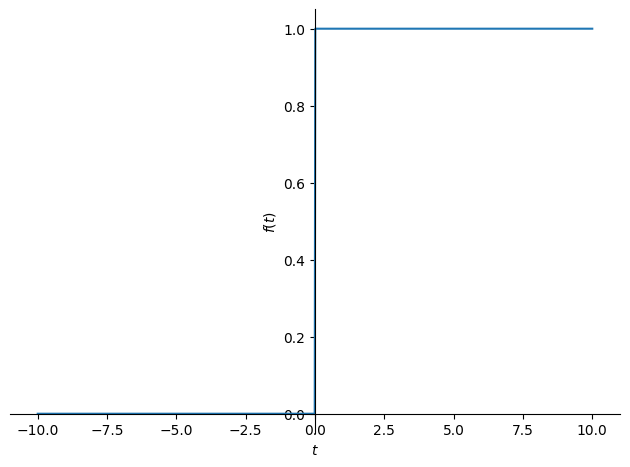

In [30]:
sympy.plot(sympy.Heaviside(t))

## Problem 3
By looping through a list, reproduce the standard Laplace transform table. That is, obtain the laplace transform for:
$$\left\{ 1, \quad t, \quad e^{-at}, \quad te^{-at}, \quad t^2 e^{-at}, \quad  \sin(\omega t), \quad \cos (\omega t), \quad 1-e^{-at}, \quad e^{-at} \sin(\omega t), \quad  e^{-at} \cos(\omega t) \right\},$$
where $\omega \in \mathbb{R}$

In [32]:
t, s, a, omega = sympy.symbols('t s a omega')

functions = [
    1,
    t,
    t**2,
    sympy.exp(-a * t),
    t * sympy.exp(-a * t),
    t**2 * sympy.exp(-a * t),
    sympy.sin(omega * t),
    sympy.cos(omega * t),
    1 - sympy.exp(-a * t),
    sympy.exp(-a * t) * sympy.sin(omega * t),
    sympy.exp(-a * t) * sympy.cos(omega * t)
]

In [36]:
laplace_transforms = []
for f in functions:
    F_s = sympy.laplace_transform(f, t, s, noconds=True)
    laplace_transforms.append((f, F_s))

# Display the original functions and their Laplace transforms
for f, F_s in laplace_transforms:
    print(f"Laplace Transform of {sympy.pretty(f)} : {sympy.pretty(F_s)}")


Laplace Transform of 1 : 1
─
s
Laplace Transform of t : 1 
──
 2
s 
Laplace Transform of  2
t  : 2 
──
 3
s 
Laplace Transform of  -a⋅t
ℯ     :   1  
─────
a + s
Laplace Transform of    -a⋅t
t⋅ℯ     :    1    
────────
       2
(a + s) 
Laplace Transform of  2  -a⋅t
t ⋅ℯ     :    2    
────────
       3
(a + s) 
Laplace Transform of sin(ω⋅t) :    ω   
───────
 2    2
ω  + s 
Laplace Transform of cos(ω⋅t) :    s   
───────
 2    2
ω  + s 
Laplace Transform of      -a⋅t
1 - ℯ     :     1     1
- ───── + ─
  a + s   s
Laplace Transform of  -a⋅t         
ℯ    ⋅sin(ω⋅t) :       ω      
─────────────
 2          2
ω  + (a + s) 
Laplace Transform of  -a⋅t         
ℯ    ⋅cos(ω⋅t) :     a + s    
─────────────
 2          2
ω  + (a + s) 


SymPy can also perform partial fraction expansion. Let's try expanding
$$F(s) = \frac{(s+1)(s+2)(s+3)}{(s+4)(s+5)(s+6)}$$
using ``F.apart(s)``.

In [43]:
s = sympy.symbols('s')

F = ((s + 1) * (s + 2) * (s + 3)) / ((s + 4) * (s + 5) * (s + 6))

print(sympy.apart(F))


1 - 30/(s + 6) + 24/(s + 5) - 3/(s + 4)
